In [1]:
# adapted from https://colab.research.google.com/drive/1oMuUz3_BOENSoaOVOymLoB2mHeYBex8S#scrollTo=xYe6G6XPbpdl

**Training samples**: a cubic polynomial with noise

**Goal:** Learn a degree 'd' Legendre polynomial on training samples.

First we do some imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import ipywidgets
from ipywidgets import interact

and set some seeds

In [3]:
np.random.seed(1932)

Now, let's define the function space

In [4]:
H = np.polynomial.legendre.legvander # Legendre polynomial basis
x = 2
H(x, 5)

array([[  1.   ,   2.   ,   5.5  ,  17.   ,  55.375, 185.75 ]])

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/23c28016951473c3ac55ed5512895376dc00b1c3">

Let's define the ground truth to be cubic

In [5]:
def cubic_gt(x):
  beta = np.array([0, -1, 0, 1])
  return H(x, 3).dot(beta)

and sample some points from this ground truth

In [6]:
n = 20
sigma = 0.3 # stdev of noise

## Compute ground-truth polynomial + noise
x = np.linspace(-1, 1, n)
y = cubic_gt(x)

y += (np.random.uniform(size=n) <= 0.2)*sigma # random L0 noise
y -= (np.random.uniform(size=n) <= 0.1)*2*sigma # random L0 noise

generate a denser grid to plot

In [7]:
xdense = np.linspace(-1, 1, 100) # points to plot
xdense = np.sort(np.concatenate((x, xdense))) # add in the sample points explicitly
ygt = cubic_gt(xdense)

Note that the output of minimizing $$\min_\beta ||X \beta - y||^2_2$$
is equivalent to $\hat{\beta} = X^\dagger y$.

So, the fit and prediction from our model

In [8]:
class MyClassifier:
    def __init__(self, d):
        self.d = d

    def fit(self, x, y):
        self.beta_ = np.linalg.pinv(H(x, self.d)).dot(y)
        
    def predict(self, x):
        return H(x, self.d).dot(self.beta_)
    
    def risk(self, x, y):
        return np.linalg.norm(y - self.predict(x))

In [9]:
def run(d):

  clf = MyClassifier(d)
  clf.fit(x, y)
  
  plt.figure(figsize=(7, 7))
  plt.plot(xdense, ygt, label='ground-truth')
  plt.scatter(x, y, c='r', label='samples')
  plt.plot(xdense, clf.predict(xdense), label='model')
  plt.ylim(-2, 2)
  plt.axis('off')
  plt.legend()

In [10]:
interact(run, d=ipywidgets.IntSlider(min=1, max=20, step=1, value=1))

interactive(children=(IntSlider(value=1, description='d', max=20, min=1), Output()), _dom_classes=('widget-int…

<function __main__.run(d)>

## Plotting the test risk

In [11]:
risks = list()
beta_norms = list()
for d in range(1, 100):
  clf = MyClassifier(d)
  clf.fit(x, y)
  beta_norms.append(np.linalg.norm(clf.beta_))
  risks.append(clf.risk(xdense, ygt))

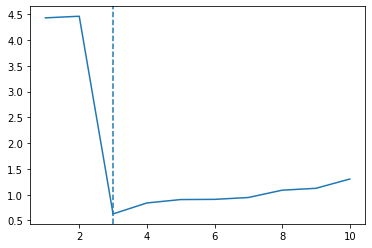

In [12]:
plt.plot(range(1, 11), risks[:10])
plt.axvline(3, linestyle='--')

## The interpolation threshold

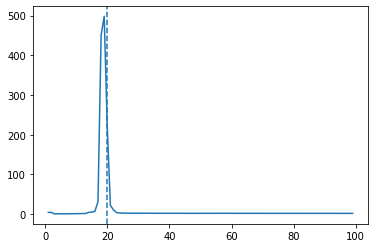

In [13]:
plt.plot(range(1, 100), risks)
plt.axvline(n, linestyle='--')

**Exercise**: Try changing n

## Plotting the norm of the betas

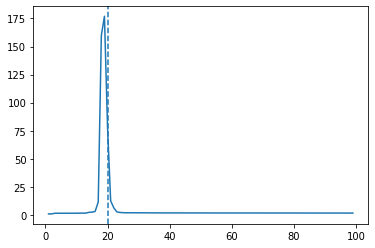

In [14]:
plt.plot(range(1, 100), beta_norms)
plt.axvline(n, linestyle='--')